# Presidential vote by counties

### Import Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
df_ca = pd.read_csv("data/presidential/pres20.csv")

In [4]:
df_ca["winner"] = df_ca[["dem", "rep", "other"]].idxmax(axis=1)

In [5]:
df_ca.head()

,county,dem,rep,other,total_votes,dem_pct,rep_pct,other_pct,year,winner
0,Alameda,617659,136309,16102,770070,0.80,0.18,0.02,2020,dem
1,Alpine,476,244,21,741,0.64,0.33,0.03,2020,dem
2,Amador,8153,13585,566,22304,0.37,0.61,0.03,2020,rep
3,Butte,50426,48730,2910,102066,0.49,0.48,0.03,2020,dem
4,Calaveras,10046,16518,600,27164,0.37,0.61,0.02,2020,rep


In [6]:
usa_df = pd.read_json(
    "data/presidential/election_results_2020.json", dtype={"county_fips": str}
)

In [7]:
usa_df.drop(["winner", "per_point_diff", "diff"], axis=1, inplace=True)

In [8]:
usa_df["winner"] = usa_df[["votes_gop", "votes_dem"]].idxmax(axis=1)

In [9]:
usa_df["winner"] = usa_df["winner"].str.upper().str.replace("votes_", "", regex=False)

In [10]:
usa_df.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,per_gop,per_dem,winner
0,Alabama,01001,Autauga County,19838,7503,27770,0.714368,0.270184,VOTES_GOP
1,Alabama,01003,Baldwin County,83544,24578,109679,0.761714,0.224090,VOTES_GOP
2,Alabama,01005,Barbour County,5622,4816,10518,0.534512,0.457882,VOTES_GOP
3,Alabama,01007,Bibb County,7525,1986,9595,0.784263,0.206983,VOTES_GOP
4,Alabama,01009,Blount County,24711,2640,27588,0.895716,0.095694,VOTES_GOP


---

### USA counties

In [11]:
# https://hub.arcgis.com/datasets/esri::usa-counties/explore

In [12]:
counties_usa = gpd.read_file("data/geo/usa_counties/USA_Counties.shp")

<AxesSubplot:>

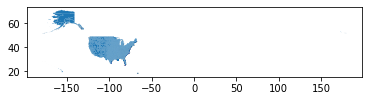

In [13]:
counties_usa.plot()

In [14]:
counties_usa.columns = counties_usa.columns.str.lower()

In [15]:
exclude = ["Alaska", "Hawaii", "Puerto Rico"]

In [16]:
counties_usa_clean = counties_usa[~counties_usa["state_name"].isin(exclude)]

---

### Merge

In [17]:
prez_geo_usa = counties_usa_clean.merge(usa_df, left_on="fips", right_on="county_fips")

In [18]:
len(prez_geo_usa)

3108

---

### Export

In [ ]:
prez_geo_usa.to_file("data/geo/prez_geo_usa.geojson", driver="GeoJSON")
prez_geo_usa.to_file("../demos/qgis-training/data/geo/prez_geo_usa_DEMO.geojson", driver="GeoJSON")

In [ ]:
usa_df.to_csv("data/presidential/pres20_usa_tutorial.csv", index=False)

In [21]:
# !mapshaper -i data/geo/prez_geo_ca.geojson \
# -simplify percentage=.5 no-repair  -o data/geo/prez_geo_ca_simplified.geojson